In [1]:
from stable_baselines.common.policies import MlpLnLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

import sys
import os

sys.path.append(os.path.dirname(os.path.abspath('')))

from tensortrade.environments import TradingEnvironment
from tensortrade.environments.actions.discrete import SimpleDiscreteStrategy
from tensortrade.environments.rewards.simple import IncrementalProfitStrategy
from tensortrade.exchanges.simulated import FBMExchange

env = DummyVecEnv([lambda: TradingEnvironment(action_strategy=SimpleDiscreteStrategy(),
                                              reward_strategy=IncrementalProfitStrategy(),
                                              exchange=FBMExchange())])

agent = PPO2(MlpLnLstmPolicy, env, verbose=1, nminibatches=1)

agent.learn(7500)

obs = env.reset()


state = None
exchange = None

for _ in range(2500):
    action, state = agent.predict(obs, state=state)
    obs, reward , _, info = env.step(action)
    
    exchange = info[0]['exchange']
    
print('Trades: ', exchange.trades())
print('Balance: ', exchange.balance()) 
print('Portfolio: ', exchange.portfolio()) 
print('P/L: ', exchange.profit_loss_percent())


/Users/adam/anaconda3/envs/tensortrade/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/adam/anaconda3/envs/tensortrade/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/adam/anaconda3/envs/tensortrade/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/adam/anaconda3/envs/tensort

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [64]:
import tensorflow as tf

from IPython.display import SVG, Image
from tensorflow.keras.utils import plot_model

n_samples=64
output_shape=(28, 28, 1)

generator = tf.keras.Sequential([
    tf.keras.layers.Dense(units=7 * 7 * n_samples, activation="relu", input_shape=(1, n_samples)),
    tf.keras.layers.Reshape(target_shape=(7, 7, n_samples)),
    tf.keras.layers.Conv2DTranspose(
        filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=1, kernel_size=3, strides=(1, 1), padding="SAME", activation="sigmoid"
    ),
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=output_shape),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

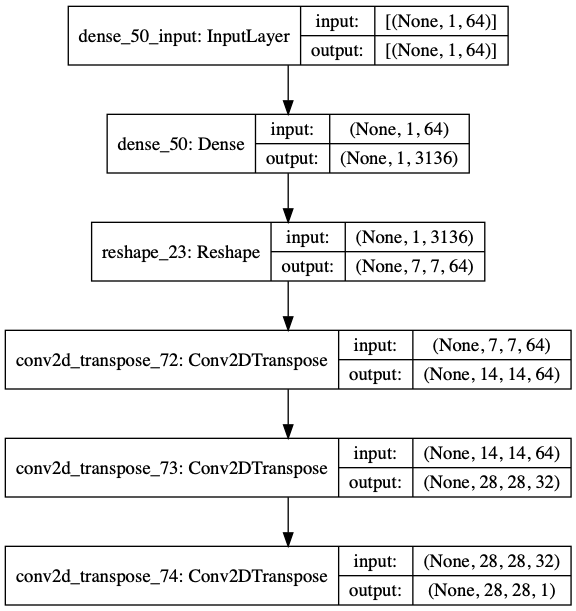

In [65]:
plot_model(generator, to_file='test_keras_plot_model.png', show_shapes=True)
Image('test_keras_plot_model.png')

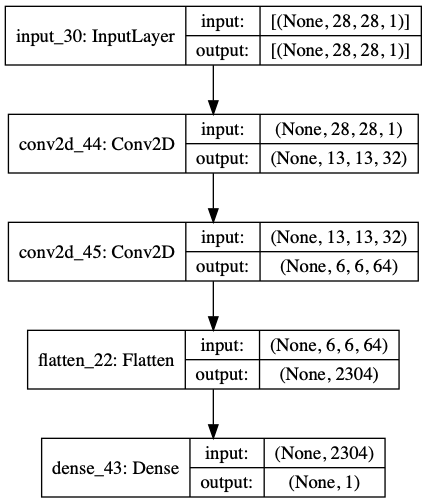

In [57]:
plot_model(discriminator, to_file='test_keras_plot_model_1.png', show_shapes=True)
Image('test_keras_plot_model_1.png')